**Kelompok 6**:
1. Aina Grace Aritonang - 2106651263
2. Dexcel - 2106726932
3. Laras Kirana Anindita - 2106653035
4. Shafiyah Audiva Yasmin - 2106706880
5. Whitney - 2106700946


Data diambil dari data Hoax dengan sumber https://www.mafindo.or.id/ , dimana Label "0" menyatakan bukan Hoax dan "1" menyatakan post Hoax.



*   Lakukan PreProcessing pada variabel "teks" di data.
*   Lalukan EDA pada data Hoax tersebut.

*   Buat Model klasifikasi Hoax terbaik dengan parameter optimal (dan cross validated)
*   Buatlah sebuah laporan Analisa Data tersebut (di Jupyter Notebook) seolah-olah anda adalah seorang Data Scientist Kominfo dan ditugaskan oleh menteri-nya untuk menjelaskan tentang data Hoax yang ada.

*   Teknik preprocessing, slicing data, variabel selection & engineering, pemilihan visualisasi, interpretasi, Performa model klasifikasi, dan penyajian report adalah hal-hal yang akan dinilai dari kasus ini.







Link Google Colab : https://colab.research.google.com/drive/16YcKu_VQXK1NoddCmyCAlfKn8b81MqRh?usp=sharing

In [ ]:
#Install packages yang akan digunakan
!pip install graphviz dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 3.0 MB/s eta 0:00:00


In [ ]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt
import time, numpy as np, seaborn as sns
from sklearn import  tree
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from dtreeviz.trees import *
import graphviz
from sklearn import svm, preprocessing
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
sns.set(style="ticks", color_codes=True)
"Done"

'Done'

# Data Understanding

In [ ]:
# Loading Data yang diberikan
import warnings; warnings.simplefilter('ignore')
import pandas as pd

fData = 'data/Data-Hoax-Mafindo.csv'
try:
    data = pd.read_csv(fData)
except:
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/Data-Hoax-Mafindo.csv
    data = pd.read_csv(fData)

data.head() #save as data

,ID,label,tanggal,judul,narasi,nama file gambar
0,71,1,17-Aug-20,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...,71.jpg
1,461,1,17-Jul-20,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,461.png
2,495,1,13-Jul-20,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...,495.png
3,550,1,8-Jul-20,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...",550.png
4,681,1,24-Jun-20,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .,681.jpg


**Feature data**:

ID - ID Data

label - 1 for False news, 0 for True fact

tanggal - tanggal narasi ditemukan

judul - judul/tagline berita yang tersebar

narasi - isi berita

nama file gambar - file gambar

In [ ]:
#melihat informasi dari tipe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701 entries, 0 to 4700
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                4701 non-null   int64 
 1   label             4701 non-null   int64 
 2   tanggal           4701 non-null   object
 3   judul             4701 non-null   object
 4   narasi            4701 non-null   object
 5   nama file gambar  4701 non-null   object
dtypes: int64(2), object(4)
memory usage: 220.5+ KB


Karena terdapat dua data yang memiliki tipe integer, maka akan diubah menjadi Category.

In [ ]:
data['label'] = data['label'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701 entries, 0 to 4700
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ID                4701 non-null   int64   
 1   label             4701 non-null   category
 2   tanggal           4701 non-null   object  
 3   judul             4701 non-null   object  
 4   narasi            4701 non-null   object  
 5   nama file gambar  4701 non-null   object  
dtypes: category(1), int64(1), object(4)
memory usage: 188.5+ KB


In [ ]:
data.isnull().sum()

ID                  0
label               0
tanggal             0
judul               0
narasi              0
nama file gambar    0
dtype: int64

Tidak terlihat data memiliki duplikasi.

# Pre-processing Text

Akan dimulai tahapan untuk melakukan pre-processing text dengan meng-install packages yang akan digunakan, yaitu Sastrawi, Unidecode, dan Textblob.

In [ ]:
!pip install sastrawi unidecode textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 26.1 MB/s eta 0:00:00
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.

In [ ]:
import warnings; warnings.simplefilter('ignore')
import itertools, re, nltk, pickle
import time, numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from matplotlib.colors import ListedColormap
from textblob import TextBlob
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from unidecode import unidecode
from nltk.tag import CRFTagger
from html import unescape
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from tqdm import tqdm

ModuleNotFoundError: ignored

In [ ]:
data['label'].value_counts() #value count pada data

Karena text pada judul dan narasi terlihat masih belum seragam sehingga akan di **Lowercase** untuk kolom judul dan narasi.

In [ ]:
data['narasi'] = data['narasi'].str.lower()
data['judul'] = data ['judul'].str.lower()

In [ ]:
#melihat judul dan narasi yang telah di lowercase
data['judul'].head()
data['narasi'].head()

Terlihat bahwa seluruh text telah di lowercase.

**Stopwords**

 Tujuan utama penggunaan stopwords adalah untuk meningkatkan kualitas analisis teks dengan memfokuskan perhatian pada kata-kata yang lebih informatif dan penting.

In [ ]:
import nltk #module nltk digunakan untuk stopwords
nltk.download('punkt')

In [ ]:
import string
import re #untuk regular expression

# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [ ]:
factory = StopWordRemoverFactory()
stemmer = StemmerFactory().create_stemmer()
sns.set(style="ticks", color_codes=True)
random_state = 170
'Done'

In [ ]:
#Inisiasi StopWords untuk menghilangkan kata yang tidak memiliki arti
Sastrawi_StopWords_id = factory.get_stop_words()

print(Sastrawi_StopWords_id)
print(len(Sastrawi_StopWords_id))

Sastrawi_StopWords_id = set(Sastrawi_StopWords_id)

In [ ]:
def remove_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

# NLTK word rokenize
def word_tokenize_wrapper(text):
    return word_tokenize(text)

In [ ]:
#menghilangkan simbol-simbol yang tidak di inginkan
data['narasi'] = data['narasi'].apply(remove_special)
data['narasi'] = data['narasi'].apply(remove_number)
data['narasi'] = data['narasi'].apply(remove_punctuation)
data['narasi'] = data['narasi'].apply(remove_whitespace_LT)
data['narasi'] = data['narasi'].apply(remove_whitespace_multiple)
data['narasi'] = data['narasi'].apply(remove_singl_char)

In [ ]:
data['judul'] = data['judul'].apply(remove_special)
data['judul'] = data['judul'].apply(remove_number)
data['judul'] = data['judul'].apply(remove_punctuation)
data['judul'] = data['judul'].apply(remove_whitespace_LT)
data['judul'] = data['judul'].apply(remove_whitespace_multiple)
data['judul'] = data['judul'].apply(remove_singl_char)

**Tokenisasi** adalah proses mengubah teks menjadi potongan-potongan yang lebih kecil


In [ ]:
data['tokenized_narasi'] = data['narasi'].apply(word_tokenize_wrapper)
data['tokenized_judul'] = data['judul'].apply(word_tokenize_wrapper)

In [ ]:
data[['narasi','tokenized_narasi']].head() #lihat narasi yang sudah di tokenisasi

In [ ]:
data[['judul','tokenized_judul']].head() #lihat judul yang telah di tokenisasi

In [ ]:
#menggabungkan tabel yang telah tertokenisasi dan belum
data_judul = data[['judul', 'tokenized_judul']]
data_narasi = data[['narasi', 'tokenized_narasi']]

Setelah tadi menginisiasi stopwords, akan dilanjutkan dengan proses **Stopwords** terhadap text yang telah melewati proses tokenisasi dan pembersihan simbol-simbol.

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

In [ ]:
# stopword indonesia from NTLK library
list_stopwords = stopwords.words('indonesian')

list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])

txt_stopword = Sastrawi_StopWords_id

list_stopwords = set(list_stopwords)

In [ ]:
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

In [ ]:
data_narasi['stopword_applied'] = data_narasi['tokenized_narasi'].apply(stopwords_removal)
data_judul['stopword_applied'] = data_judul['tokenized_judul'].apply(stopwords_removal)

In [ ]:
data_narasi[['tokenized_narasi', 'stopword_applied']].head() #lihat data narasi telah ditokenisasi dan stopwords

In [ ]:
data_judul[['tokenized_judul', 'stopword_applied']].head() #lihat data judul telah tokenisasi dan stopwords

**Slang** adalah proses menghilangkan atau mengubah frasa tidak resmi yang sering digunakan dalam percakapan sehari-hari dan biasanya tidak terdapat dalam kamus formal. Dilakukan untuk mencegah ambiguitas.

In [ ]:
#menggambil kamus slang (bahasa non baku) menggunakan github
slangS = pd.read_csv('https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv')

In [ ]:
baku = {}

for index, row in slangS.iterrows():
    if row[0] not in baku:
        baku[row[0]] = row[1]

def normalized_term(document):
    return [baku[term] if term in baku else term for term in document]

In [ ]:
#Menerapkan slang pada kolom judul dan narasi
data_narasi['baku_narasi'] = data_narasi['stopword_applied'].apply(normalized_term)
data_judul['baku_judul'] = data_judul['stopword_applied'].apply(normalized_term)

In [ ]:
#lihat tabel narasi yang telah tokenisasi, stopwords, dan slang
data_narasi[['tokenized_narasi', 'stopword_applied', 'baku_narasi']].head()

In [ ]:
data_judul[['tokenized_judul', 'stopword_applied', 'baku_judul']].head() #lihat untuk judul

Setelah data melewati proses stopword, tokenized, dan slang akan dilakukan **stemmer** (menghilangkan imbuhan untuk dipetakan kepada sebuah kata baku), **lemminaisation** (menghasilkan kata baku bergantung konteks), dan **TF-IDF**.

In [ ]:
!pip install swifter # Digunakan packages swifter dengan tujuan mengoptimalkan kinerja ketika Anda bekerja dengan DataFrame besar menggunakan operasi Pandas

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

**Stemmer** adalah mengurangi kata-kata dalam teks ke bentuk dasarnya atau kata dasar dan mengelompokkan variasi kata ke dalam bentuk yang lebih sederhana

In [ ]:
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in data_narasi['baku_narasi']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

for document in data_judul['baku_judul']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])

print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

data_narasi['narasi_tokens_stemmed'] = data_narasi['baku_narasi'].swifter.apply(get_stemmed_term)
data_judul['judul_tokens_stemmed'] = data_judul['baku_judul'].swifter.apply(get_stemmed_term)
print(data_narasi['narasi_tokens_stemmed'])
print(data_judul['judul_tokens_stemmed'])

In [ ]:
#lihat data narasi telah melewati proses stemmed
data_narasi[['narasi','tokenized_narasi', 'stopword_applied', 'baku_narasi','narasi_tokens_stemmed']].head()

In [ ]:
#lihat data judul telah melewati stemmed
data_judul[['judul','tokenized_judul', 'stopword_applied', 'baku_judul','judul_tokens_stemmed']].head()

Normalisasi atau perbaikan format whitespace (spasi, tab, newline) dalam suatu teks. Fungsi ini menggunakan ekspresi reguler untuk mencari pola spasi berlebih dan menggantinya dengan satu spasi.

In [ ]:
def _normalize_whitespace(text):
    corrected = str(text)
    corrected = re.sub(r"//t",r"\t", corrected)
    corrected = re.sub(r"( )\1+",r"\1", corrected)
    corrected = re.sub(r"(\n)\1+",r"\1", corrected)
    corrected = re.sub(r"(\r)\1+",r"\1", corrected)
    corrected = re.sub(r"(\t)\1+",r"\1", corrected)
    return corrected.strip(" ")

In [ ]:
data_narasi['narasi_tokens_stemmed_normal'] = data_narasi['narasi_tokens_stemmed'].apply(_normalize_whitespace)
data_narasi['narasi_tokens_stemmed_normal']

In [ ]:
data_judul['judul_tokens_stemmed_normal'] = data_judul['judul_tokens_stemmed'].apply(_normalize_whitespace)
data_judul['judul_tokens_stemmed_normal']

In [ ]:
#lihat data sampai tahap proses normalisasi
data_narasi[['narasi','tokenized_narasi', 'stopword_applied', 'baku_narasi','narasi_tokens_stemmed','narasi_tokens_stemmed_normal']].head()

In [ ]:
#data judul telah melewati proses normalisasi
data_judul[['judul','tokenized_judul', 'stopword_applied', 'baku_judul','judul_tokens_stemmed','judul_tokens_stemmed_normal']].head()

**Lematization** adalah proses mengubah kata-kata dalam teks ke bentuk dasarnya atau kata dasar. Lemmatization lebih kompleks karena melibatkan analisis morfologi kata dan menggunakan kamus atau aturan gramatikal untuk menemukan bentuk dasar.

In [ ]:
import nltk
nltk.download('wordnet')

wn= nltk.WordNetLemmatizer()
def lemmatization(text):
    text = ' '.join(wn.lemmatize(word) for word in text.split() if word in text)
    return text

In [ ]:
# Buat kolom tambahan untuk data description yang telah dilemmatization
data_narasi['narasi_tokens_stemmed_normal_lemma'] = data_narasi['narasi_tokens_stemmed_normal'].apply(lemmatization)
data_narasi['narasi_tokens_stemmed_normal_lemma']

In [ ]:
# Buat kolom tambahan untuk data description yang telah dilemmatization
data_judul['judul_tokens_stemmed_normal_lemma'] = data_judul['judul_tokens_stemmed_normal'].apply(lemmatization)
data_judul['judul_tokens_stemmed_normal_lemma']

In [ ]:
#lihat data yang telah melewati tahap lemmatisasi
data_narasi[['narasi','tokenized_narasi', 'stopword_applied', 'baku_narasi','narasi_tokens_stemmed','narasi_tokens_stemmed_normal','narasi_tokens_stemmed_normal_lemma']].head()

In [ ]:
data_judul[['judul','tokenized_judul', 'stopword_applied', 'baku_judul','judul_tokens_stemmed','judul_tokens_stemmed_normal','judul_tokens_stemmed_normal_lemma']].head()

In [ ]:
#Mengubah text menjadi list
import ast

def convert_text_list(texts):
    texts = ast.literal_eval(texts)
    return [text for text in texts]

In [ ]:
data_narasi['list_narasi_tokens_stemmed_normal_lemma'] = data_narasi['narasi_tokens_stemmed_normal_lemma'].apply(convert_text_list)
print(data_narasi['list_narasi_tokens_stemmed_normal_lemma'][90])
print("\ntype : ", type(data_narasi['list_narasi_tokens_stemmed_normal_lemma'][90]))

In [ ]:
data_judul['list_judul_tokens_stemmed_normal_lemma'] = data_judul['judul_tokens_stemmed_normal_lemma'].apply(convert_text_list)
print(data_judul['list_judul_tokens_stemmed_normal_lemma'][90])
print("\ntype : ", type(data_judul['list_judul_tokens_stemmed_normal_lemma'][90]))

**TF-IDF** atau *Term Frequency-Inverse Document Frequency* adalah suatu metode yang digunakan untuk mengevaluasi seberapa penting suatu kata dalam suatu dokumen terhadap seluruh koleksi dokumen.

*Term Frequency* adalah ukuran seberapa sering suatu kata muncul dalam suatu dokumen. Dihitung dengan cara menghitung jumlah kemunculan suatu kata dalam dokumen tersebut dan kemudian dibagi dengan total jumlah kata dalam dokumen.

In [ ]:
#Term freq untuk melihat frekuensi kemunculan term i pada dokumen j dibagi dengan total term pada dokumen j
def calc_TF(document):
    TF_dict = {}
    for term in document:
        if term in TF_dict:
            TF_dict[term] += 1
        else:
            TF_dict[term] = 1
    #menghitung tf untuk setiap kata
    for term in TF_dict:
        TF_dict[term] = TF_dict[term] / len(document)
    return TF_dict

In [ ]:
data_narasi["TF_dict_narasi"] = data_narasi['list_narasi_tokens_stemmed_normal_lemma'].apply(calc_TF)
data_narasi["TF_dict_narasi"].head()

In [ ]:
data_judul["TF_dict_judul"] = data_judul['list_judul_tokens_stemmed_normal_lemma'].apply(calc_TF)
data_judul["TF_dict_judul"].head()

Dapat dilihat bahwa untuk setiap baris dari kolom judul dan narasi dapat dihitung frekuensi munculnya (seberapa banyak kata tersebut muncul).

Sementara itu, proses **IDF** adalah ukuran seberapa unik suatu kata dalam seluruh koleksi dokumen. Ini dihitung dengan cara menghitung jumlah dokumen yang mengandung kata tersebut, kemudian mengambil logaritma terbalik dari rasio jumlah total dokumen dengan jumlah dokumen yang mengandung kata tersebut.

In [ ]:
#Inverse Document Frequency (IDF) berfungsi mengurangi bobot suatu term jika kemunculannya banyak tersebar diseluruh dokumen

def calc_DF(tfDict):
    count_DF = {}
    for document in tfDict:
        for term in document:
            if term in count_DF:
                count_DF[term] += 1
            else:
                count_DF[term] = 1
    return count_DF

In [ ]:
DFnarasi = calc_DF(data_narasi["TF_dict_narasi"])

In [ ]:
n_document = len(data_narasi)

def calc_IDF(__n_document, __DF):
    IDF_Dict = {}
    for term in __DF:
        IDF_Dict[term] = np.log(__n_document / (__DF[term] + 1))
    return IDF_Dict

#Simpan IDFnarasi
IDFnarasi = calc_IDF(n_document, DFnarasi)
IDFnarasi

In [ ]:
DFjudul = calc_DF(data_judul["TF_dict_judul"])
DFjudul

In [ ]:
n_document = len(data_judul)

def calc_IDF(__n_document, __DF):
    IDF_Dict = {}
    for term in __DF:
        IDF_Dict[term] = np.log(__n_document / (__DF[term] + 1))
    return IDF_Dict

#Simpan IDFjudul
IDFjudul = calc_IDF(n_document, DFjudul)
IDFjudul

Dari proses IDF sendiri kita dapat menilai seberapa unik suatu kata, berdasarkan perhitunga yang muncul di atas.

Proses keduanya akan menghasilkan skor yang mengukur pentingnya suatu kata dalam suatu dokumen relatif terhadap koleksi dokumen secara keseluruhan. Semakin tinggi skor TF-IDF suatu kata dalam suatu dokumen, semakin penting kata tersebut dalam dokumen tersebut.

**TF - IDF**

In [ ]:
#Menghitung TF-IDF narasi
def calc_TF_IDF(TF):
    TF_IDF_Dict = {}
    for key in TF:
        TF_IDF_Dict[key] = TF[key] * IDFnarasi[key]
    return TF_IDF_Dict

In [ ]:
#Simpan TF-IDF dict narasi
data_narasi["TF-IDF_dict_narasi"] = data_narasi["TF_dict_narasi"].apply(calc_TF_IDF)
data_narasi["TF-IDF_dict_narasi"]

In [ ]:
#Menghitung TF-IDF judul
def calc_TF_IDF(TF):
    TF_IDF_Dict = {}
    for key in TF:
        TF_IDF_Dict[key] = TF[key] * IDFjudul[key]
    return TF_IDF_Dict

In [ ]:
#Simpan TF-IDF dict judul
data_judul["TF-IDF_dict_judul"] = data_judul["TF_dict_judul"].apply(calc_TF_IDF)
data_judul["TF-IDF_dict_judul"]

Data Text telah melewati hasil **Pre-Processing** dengan step yang digunakan ada tokenisasi, menghilangkan simbol-simbol, stopwords, slang, stemmer, lematization, dan TF-IDF. Oleh karena itu, data text akan di save ke csv baru untuk dilakukan EDA dan Modelling lebih lanjut.

Selanjutnya, karena terdapat banyak kolom yang telah melewati pre-processing maka akan dipilih beberapa kolom saja yang akan melewati proses EDA dan Modelling agar tidak membingungkan.

Maka dari itu, untuk kolom narasi hanya diambil 'narasi','narasi_tokens_stemmed_normal_lemma','TF-IDF_dict_naras' dan selebihnya di drop (hal berlaku sama untuk kolom judul).

In [ ]:
narasi = data_narasi.drop(['tokenized_narasi','stopword_applied','baku_narasi','narasi_tokens_stemmed','narasi_tokens_stemmed_normal','list_narasi_tokens_stemmed_normal_lemma','TF_dict_narasi'], axis=1)
narasi

In [ ]:
judul = data_judul.drop(['tokenized_judul','stopword_applied','baku_judul','judul_tokens_stemmed','judul_tokens_stemmed_normal','list_judul_tokens_stemmed_normal_lemma','TF_dict_judul'], axis=1)
judul

Jangan lupa munculkan kembali kolom tabel untuk keperluan modelling

In [ ]:
label = data['label']
label = pd.DataFrame(label)
label

Combine ke-3 kolom, yaitu Judul, Narasi, dan Tabel yang sudah dibersihkan dan dipilih.

In [ ]:
dfcombined = pd.concat([label, judul, narasi], axis=1)
dfcombined.head()

In [ ]:
dfcombined.to_csv("PreproComplete.csv")

Save combined df ke csv agar memudahkan visualisasi tanpa memerlukan "run all"

# EDA

**Exploratory Data Analysis** adalah suatu pendekatan dalam statistika dan ilmu data yang bertujuan untuk menyelidiki dan memahami struktur, pola, dan karakteristik dasar dari suatu dataset tanpa membuat asumsi atau pengujian hipotesis yang kuat.


Agar proses EDA dan Modelling selanjutnya tidak running dari awal, digunakan modul Gdown untuk membantu.

In [ ]:
#Digunakan modul gdown untuk mengambil data dari Google Drive
!gdown 1dV-NW__z6zdMAG6WF3VYyGe8NKq1KXis

Downloading...
From: https://drive.google.com/uc?id=1dV-NW__z6zdMAG6WF3VYyGe8NKq1KXis
To: /content/PreprocessingAllincLABEL_complete.csv
100% 17.7M/17.7M [00:00<00:00, 50.2MB/s]


In [ ]:
dfs = pd.read_csv("PreproComplete.csv")
dfs

,Unnamed: 0,label,judul,judul_tokens_stemmed_normal_lemma,TF-IDF_dict_judul,narasi,narasi_tokens_stemmed_normal_lemma,TF-IDF_dict_narasi
0,0,1,pemakaian masker menyebabkan penyakit legionna...,"['pakai', 'masker', 'sebab', 'sakit', 'legionn...","{'pakai': 0.8624791609265196, 'masker': 1.0640...",caller to radio talk show recently shared th...,"['caller', 'tapi', 'radio', 'talk', 'show', 'r...","{'caller': 0.09702979188080232, 'tapi': 0.1467..."
1,1,1,instruksi gubernur jateng tentang penilangan b...,"['instruksi', 'gubernur', 'jateng', 'tilang', ...","{'instruksi': 0.6223720562354573, 'gubernur': ...",ythseluruh anggota grup sesuai instruksi guber...,"['ythseluruh', 'anggota', 'grup', 'sesuai', 'i...","{'ythseluruh': 0.49046121615706806, 'anggota':..."
2,2,1,foto jim rohn jokowi adalah presiden terbaik d...,"['foto', 'jim', 'rohn', 'jokowi', 'presiden', ...","{'foto': 0.256665257269125, 'jim': 0.735691824...",jokowi adalah presiden terbaik dlm sejarah ban...,"['jokowi', 'presiden', 'baik', 'dalam', 'sejar...","{'jokowi': 0.2359594187363993, 'presiden': 0.2..."
3,3,1,ini bukan politik tapi kenyataan pak jokowi be...,"['politik', 'nyata', 'jokowi', 'hasil', 'pulan...","{'politik': 0.63860892554688, 'nyata': 0.48273...",maaf mas dan mbak ini bukan politik tapi kenya...,"['maaf', 'mas', 'mbak', 'politik', 'nyata', 'j...","{'maaf': 0.06035873627648455, 'mas': 0.0713172..."
4,4,1,foto kadrun kalo lihat foto ini panas dingin,"['foto', 'kadrun', 'lihat', 'foto', 'panas', '...","{'foto': 0.8555508575637498, 'kadrun': 1.04305...",kadrun kalo lihat foto ini panas dingin,"['kadrun', 'lihat', 'foto', 'panas', 'dingin']","{'kadrun': 1.149496065984384, 'lihat': 0.79337..."
...,...,...,...,...,...,...,...,...
4696,4696,0,banserpdip berdamai,"['banserpdip', 'damai']","{'banserpdip': 3.8811916752320927, 'damai': 3....",ratusan massa dari barisan serba guna banser d...,"['ratus', 'massa', 'baris', 'serba', 'banser',...","{'ratus': 0.3831777198332725, 'massa': 0.39364..."
4697,4697,1,erdogan tak mau duduk di kursi tamu yang lebih...,"['erdogan', 'duduk', 'kursi', 'tamu', 'kursi',...","{'erdogan': 0.8529462687480185, 'duduk': 0.852...",erdogan datang ke vatikan menjumpai baba pop v...,"['erdogan', 'vatikan', 'jumpa', 'baba', 'pop',...","{'erdogan': 0.5859948036219128, 'vatikan': 0.3..."
4698,4698,1,imigran china sengaja membawa virus tujuannya ...,"['imigran', 'china', 'sengaja', 'bawa', 'virus...","{'imigran': 0.8557615773237538, 'china': 0.433...",imigran cn sengaja membawa virus dan mereka te...,"['imigran', 'cn', 'sengaja', 'bawa', 'virus', ...","{'imigran': 0.3331885530898038, 'cn': 0.735691..."
4699,4699,1,bukti kecurangan jokowi bagi sembako,"['bukti', 'curang', 'jokowi', 'sembako']","{'bukti': 1.3912896932819914, 'curang': 1.2993...",beredar dimana mana jadi viral video ini apa t...,"['edar', 'mana', 'viral', 'video', 'tindak', '...","{'edar': 0.34719239093157944, 'mana': 0.443017..."


In [ ]:
#Cek missing values
dfs.isnull()

,Unnamed: 0,label,judul,judul_tokens_stemmed_normal_lemma,TF-IDF_dict_judul,narasi,narasi_tokens_stemmed_normal_lemma,TF-IDF_dict_narasi
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4696,False,False,False,False,False,False,False,False
4697,False,False,False,False,False,False,False,False
4698,False,False,False,False,False,False,False,False
4699,False,False,False,False,False,False,False,False


In [ ]:
#Cek missing values
dfs.isna

<bound method DataFrame.isna of       Unnamed: 0  label                                              judul  \
0              0      1  pemakaian masker menyebabkan penyakit legionna...   
1              1      1  instruksi gubernur jateng tentang penilangan b...   
2              2      1  foto jim rohn jokowi adalah presiden terbaik d...   
3              3      1  ini bukan politik tapi kenyataan pak jokowi be...   
4              4      1       foto kadrun kalo lihat foto ini panas dingin   
...          ...    ...                                                ...   
4696        4696      0                                banserpdip berdamai   
4697        4697      1  erdogan tak mau duduk di kursi tamu yang lebih...   
4698        4698      1  imigran china sengaja membawa virus tujuannya ...   
4699        4699      1               bukti kecurangan jokowi bagi sembako   
4700        4700      1  anak kecil bersembunyi di kolong meja saat ber...   

                      judul_tok

Dapat dilihat tidak ada missing values pada beberapa kolom pada data.

In [ ]:
#Akan didrop kolom yang mengandung vektor untuk keperluan visualisasi
dfy=dfs.drop(columns=["Unnamed: 0","label","TF-IDF_dict_narasi","TF-IDF_dict_judul","judul","narasi"],axis=1)
dfy

,judul_tokens_stemmed_normal_lemma,narasi_tokens_stemmed_normal_lemma
0,"['pakai', 'masker', 'sebab', 'sakit', 'legionn...","['caller', 'tapi', 'radio', 'talk', 'show', 'r..."
1,"['instruksi', 'gubernur', 'jateng', 'tilang', ...","['ythseluruh', 'anggota', 'grup', 'sesuai', 'i..."
2,"['foto', 'jim', 'rohn', 'jokowi', 'presiden', ...","['jokowi', 'presiden', 'baik', 'dalam', 'sejar..."
3,"['politik', 'nyata', 'jokowi', 'hasil', 'pulan...","['maaf', 'mas', 'mbak', 'politik', 'nyata', 'j..."
4,"['foto', 'kadrun', 'lihat', 'foto', 'panas', '...","['kadrun', 'lihat', 'foto', 'panas', 'dingin']"
...,...,...
4696,"['banserpdip', 'damai']","['ratus', 'massa', 'baris', 'serba', 'banser',..."
4697,"['erdogan', 'duduk', 'kursi', 'tamu', 'kursi',...","['erdogan', 'vatikan', 'jumpa', 'baba', 'pop',..."
4698,"['imigran', 'china', 'sengaja', 'bawa', 'virus...","['imigran', 'cn', 'sengaja', 'bawa', 'virus', ..."
4699,"['bukti', 'curang', 'jokowi', 'sembako']","['edar', 'mana', 'viral', 'video', 'tindak', '..."


In [ ]:
#Data akan disimpan dalam bentuk txt untuk kebutuhan visualisasi
dfy.to_csv("newbersih.txt", index=False, encoding='utf8', header=False)

Visualisasi Voyant Word Cloud Tanpa Label Hoax 1/0


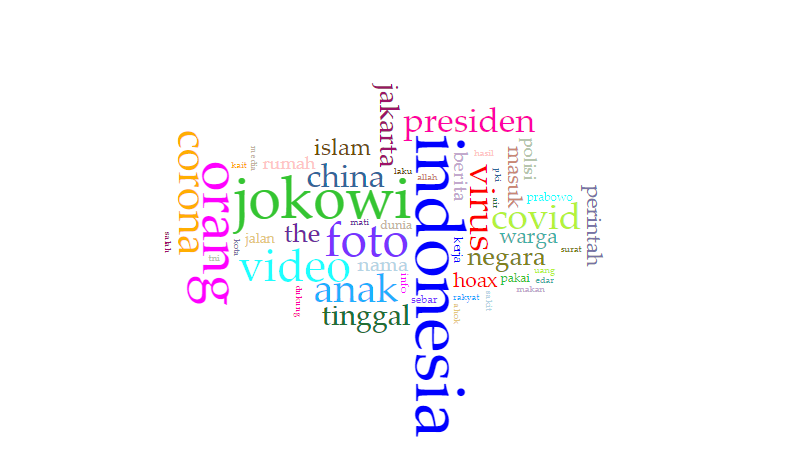

In [ ]:
#Visualisasi Word Cloud dengan Voyant untuk semua keyword tanpa peduli label 1/0
from IPython.display import Image, display
import requests

imgasli = "https://raw.githubusercontent.com/ainagracee/VisualisasiKlasifikasi/main/visualisasi%20asli.png"
judulteks = "Visualisasi Voyant Word Cloud Tanpa Label Hoax 1/0"
print(judulteks)
display(Image(requests.get(imgasli).content))

Dapat terlihat bahwa kata yang paling banyak muncul adalah yang paling terbesar dalam gambar, yaitu Indonesia, Jokowi, Orang, Foto, Video, dan selebihnya dapat dilihat pada visualisasi di atas. Artinya, dari sumber data Hoax yang kita ambil melalui link https://www.mafindo.or.id/ adalah pemberitaan terbanyak atau tersering (tren) adalah kata-kata yang muncul pada visualisasi di atas.

In [ ]:
#Akan didrop kolom yang mengandung vektor untuk keperluan visualisasi
dfz=dfs.drop(columns=["Unnamed: 0","TF-IDF_dict_narasi","TF-IDF_dict_judul","judul","narasi"],axis=1)
dfz

,label,judul_tokens_stemmed_normal_lemma,narasi_tokens_stemmed_normal_lemma
0,1,"['pakai', 'masker', 'sebab', 'sakit', 'legionn...","['caller', 'tapi', 'radio', 'talk', 'show', 'r..."
1,1,"['instruksi', 'gubernur', 'jateng', 'tilang', ...","['ythseluruh', 'anggota', 'grup', 'sesuai', 'i..."
2,1,"['foto', 'jim', 'rohn', 'jokowi', 'presiden', ...","['jokowi', 'presiden', 'baik', 'dalam', 'sejar..."
3,1,"['politik', 'nyata', 'jokowi', 'hasil', 'pulan...","['maaf', 'mas', 'mbak', 'politik', 'nyata', 'j..."
4,1,"['foto', 'kadrun', 'lihat', 'foto', 'panas', '...","['kadrun', 'lihat', 'foto', 'panas', 'dingin']"
...,...,...,...
4695,1,"['tulis', 'partai', 'komunis', 'indonesia', 'g...","['anggap', 'indonesia', 'pimpin', 'jokowi']"
4697,1,"['erdogan', 'duduk', 'kursi', 'tamu', 'kursi',...","['erdogan', 'vatikan', 'jumpa', 'baba', 'pop',..."
4698,1,"['imigran', 'china', 'sengaja', 'bawa', 'virus...","['imigran', 'cn', 'sengaja', 'bawa', 'virus', ..."
4699,1,"['bukti', 'curang', 'jokowi', 'sembako']","['edar', 'mana', 'viral', 'video', 'tindak', '..."


In [ ]:
#Membuat visualisasi untuk hoax
#Akan dilakukan drop pada entri dengan label 0/tidak hoax

dfhoax = dfz[dfz['label'] != "0"]
dfhoax

,label,judul_tokens_stemmed_normal_lemma,narasi_tokens_stemmed_normal_lemma
0,1,"['pakai', 'masker', 'sebab', 'sakit', 'legionn...","['caller', 'tapi', 'radio', 'talk', 'show', 'r..."
1,1,"['instruksi', 'gubernur', 'jateng', 'tilang', ...","['ythseluruh', 'anggota', 'grup', 'sesuai', 'i..."
2,1,"['foto', 'jim', 'rohn', 'jokowi', 'presiden', ...","['jokowi', 'presiden', 'baik', 'dalam', 'sejar..."
3,1,"['politik', 'nyata', 'jokowi', 'hasil', 'pulan...","['maaf', 'mas', 'mbak', 'politik', 'nyata', 'j..."
4,1,"['foto', 'kadrun', 'lihat', 'foto', 'panas', '...","['kadrun', 'lihat', 'foto', 'panas', 'dingin']"
...,...,...,...
4695,1,"['tulis', 'partai', 'komunis', 'indonesia', 'g...","['anggap', 'indonesia', 'pimpin', 'jokowi']"
4697,1,"['erdogan', 'duduk', 'kursi', 'tamu', 'kursi',...","['erdogan', 'vatikan', 'jumpa', 'baba', 'pop',..."
4698,1,"['imigran', 'china', 'sengaja', 'bawa', 'virus...","['imigran', 'cn', 'sengaja', 'bawa', 'virus', ..."
4699,1,"['bukti', 'curang', 'jokowi', 'sembako']","['edar', 'mana', 'viral', 'video', 'tindak', '..."


In [ ]:
#Akan dilakukan drop untuk kolom label agar data hanya berisi teks
hoax=dfhoax.drop(columns=["label"],axis=1)

In [ ]:
#Data akan disimpan dalam bentuk txt untuk kebutuhan visualisasi
hoax.to_csv("hoax.txt", index=False, encoding='utf8', header=False)

Visualisasi Voyant Word Cloud Hoax


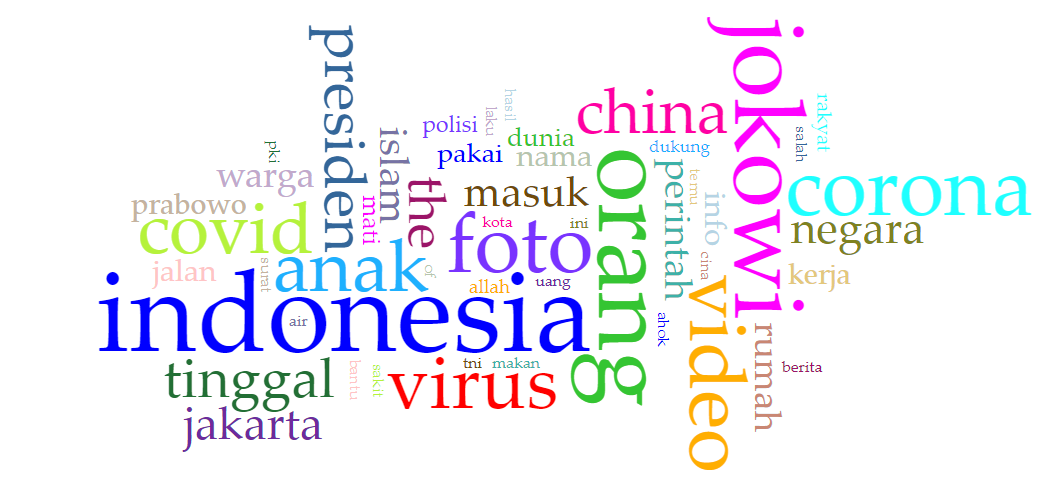

In [ ]:
#Visualisasi Word Cloud dengan Voyant untuk semua hoax
from IPython.display import Image, display
import requests

imghoax = "https://raw.githubusercontent.com/ainagracee/VisualisasiKlasifikasi/main/visualisasi%20hoax.png"
judulteks1 = "Visualisasi Voyant Word Cloud Hoax"
print(judulteks1)
display(Image(requests.get(imghoax).content))

Dapat terlihat bahwa kata yang paling banyak muncul adalah yang paling terbesar dalam gambar, yaitu Indonesia, Orang, Jokowi, Foto, Corona, dan selebihnya dapat dilihat pada visualisasi di atas. Artinya, dari sumber data Hoax yang kita ambil melalui link https://www.mafindo.or.id/ adalah pemberitaan terbanyak atau tersering (tren) adalah kata-kata yang muncul pada visualisasi di atas.

In [ ]:
#Perbandingan word cloud asli/unlabeled dengan word cloud hoax
from IPython.display import HTML

# Create HTML code to display images side by side
compare= f"<img src='{imgasli}' style='width: 36%; margin-right: 10px;'><img src='{imghoax}' style='width: 45%;'>"

# Display the HTML code
display(HTML(compare))

Berdasarkan perbandingan antara entry asli (ada hoax dan tidak hoax) yang berjumlah 4701 dengan entry hoax yang berjumlah 3850, bisa kita lihat word cloud terbesar adalah Indonesia. Untuk kata setelahnya, terdapat sedikit perbedaan. Untuk entry asli, 4 kata terbesar setelahnya adalah Jokowi, Orang, Foto, dan Video secara berurutan. Sementara untuk entry hoax, 4 kata terbesar setelahnya adalah Orang, Jokowi, Foto, dan Corona.

# Modelling Klasifikasi

Model klasifikasi Hoax terbaik dengan parameter optimal (dan cross validated)

Akan diuji beberapa model :

In [ ]:
#Digunakan modul gdown untuk mengambil data dari Google Drive
!gdown 1nzuj4YZTtVbJ7-LVJXLhhMld7kEZfLAQ

Downloading...
From: https://drive.google.com/uc?id=1nzuj4YZTtVbJ7-LVJXLhhMld7kEZfLAQ
To: /content/PreproComplete.csv
100% 5.10M/5.10M [00:00<00:00, 27.7MB/s]


In [ ]:
import pandas as pd

df1 = pd.read_csv('PreproComplete.csv')
df1.head()

,Unnamed: 0,label,judul,judul_tokens_stemmed_normal_lemma,TF-IDF_dict_judul,narasi,narasi_tokens_stemmed_normal_lemma,TF-IDF_dict_narasi
0,0,1,pemakaian masker menyebabkan penyakit legionna...,"['pakai', 'masker', 'sebab', 'sakit', 'legionn...","{'pakai': 0.8624791609265196, 'masker': 1.0640...",caller to radio talk show recently shared th...,"['caller', 'tapi', 'radio', 'talk', 'show', 'r...","{'caller': 0.09702979188080232, 'tapi': 0.1467..."
1,1,1,instruksi gubernur jateng tentang penilangan b...,"['instruksi', 'gubernur', 'jateng', 'tilang', ...","{'instruksi': 0.6223720562354573, 'gubernur': ...",ythseluruh anggota grup sesuai instruksi guber...,"['ythseluruh', 'anggota', 'grup', 'sesuai', 'i...","{'ythseluruh': 0.49046121615706806, 'anggota':..."
2,2,1,foto jim rohn jokowi adalah presiden terbaik d...,"['foto', 'jim', 'rohn', 'jokowi', 'presiden', ...","{'foto': 0.256665257269125, 'jim': 0.735691824...",jokowi adalah presiden terbaik dlm sejarah ban...,"['jokowi', 'presiden', 'baik', 'dalam', 'sejar...","{'jokowi': 0.2359594187363993, 'presiden': 0.2..."
3,3,1,ini bukan politik tapi kenyataan pak jokowi be...,"['politik', 'nyata', 'jokowi', 'hasil', 'pulan...","{'politik': 0.63860892554688, 'nyata': 0.48273...",maaf mas dan mbak ini bukan politik tapi kenya...,"['maaf', 'mas', 'mbak', 'politik', 'nyata', 'j...","{'maaf': 0.06035873627648455, 'mas': 0.0713172..."
4,4,1,foto kadrun kalo lihat foto ini panas dingin,"['foto', 'kadrun', 'lihat', 'foto', 'panas', '...","{'foto': 0.8555508575637498, 'kadrun': 1.04305...",kadrun kalo lihat foto ini panas dingin,"['kadrun', 'lihat', 'foto', 'panas', 'dingin']","{'kadrun': 1.149496065984384, 'lihat': 0.79337..."


# Model SVM (Support Vector Machine)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
import ast

# ubah string
df1['TF-IDF_dict_judul'] = df1['TF-IDF_dict_judul'].apply(ast.literal_eval)

# definisikan menjadi string
def dict_to_string(x):
    return str(x)

# mengubah
df1['TF-IDF_dict_judul'] = df1['TF-IDF_dict_judul'].apply(dict_to_string)

#TfidfVectorizer masukan ke kolom yang sudah di transformasi
tfidf_vectorizer = TfidfVectorizer()
X_sparse = tfidf_vectorizer.fit_transform(df1['TF-IDF_dict_judul'])

# pisahkan kolom X dan Y
y = df1['label']
X_train, X_test, y_train, y_test = train_test_split(X_sparse, y, test_size=0.2, random_state=42)

# Klasifikasi SVM
svm_classifier = SVC(kernel='linear', C=1.0)


svm_classifier.fit(X_train, y_train)

# Prediksi di kolom Y
y_pred = svm_classifier.predict(X_test)

# Hasil predikis
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:\n', classification_report(y_test, y_pred))


Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.24      0.36       164
           1       0.86      0.99      0.92       777

    accuracy                           0.86       941
   macro avg       0.82      0.61      0.64       941
weighted avg       0.85      0.86      0.82       941



**Interpretasi**
Hasil evaluasi model dapat diinterpretasikan sebagai berikut:

### Akurasi (Accuracy): 0.86
Akurasi mengukur sejauh mana model dapat mengklasifikasikan data dengan benar. Dalam kasus ini, akurasi model adalah 0.86, atau 86%. Ini berarti sekitar 86% dari semua prediksi yang dilakukan oleh model benar.

### Laporan Klasifikasi (Classification Report):

#### Kelas 0:
- Presisi (Precision): 0.78
  - Dari semua prediksi yang diklasifikasikan sebagai Kelas 0, sekitar 78% di antaranya benar-benar termasuk dalam Kelas 0.
- Recall: 0.24
  - Dari semua sampel yang sebenarnya termasuk dalam Kelas 0, hanya sekitar 24% yang berhasil diidentifikasi oleh model.
- F1-Score: 0.36
  - Merupakan harmonic mean dari presisi dan recall. Sebuah nilai yang mencakup keseimbangan antara kedua metrik tersebut.
- Support: 164
  - Jumlah total sampel dalam Kelas 0.

#### Kelas 1:
- Presisi: 0.86
  - Dari semua prediksi yang diklasifikasikan sebagai Kelas 1, sekitar 86% di antaranya benar-benar termasuk dalam Kelas 1.
- Recall: 0.99
  - Dari semua sampel yang sebenarnya termasuk dalam Kelas 1, sekitar 99% yang berhasil diidentifikasi oleh model.
- F1-Score: 0.92
  - Nilai yang tinggi menunjukkan model yang baik dalam mengklasifikasikan Kelas 1.
- Support: 777
  - Jumlah total sampel dalam Kelas 1.

### Kesimpulan:
- Meskipun akurasi keseluruhan model cukup tinggi (86%), kita perlu memperhatikan evaluasi kelas secara terpisah.
- Model memiliki kinerja yang baik dalam mengidentifikasi Kelas 1, tetapi memiliki tantangan dalam mengidentifikasi Kelas 0, seperti yang tercermin dari nilai recall yang rendah untuk Kelas 0.
- F1-score menggabungkan presisi dan recall, memberikan gambaran keseluruhan tentang kinerja model. Dalam hal ini, F1-score secara keseluruhan cukup baik, tetapi ada perbedaan yang signifikan antara kinerja pada kedua kelas.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
import ast

# Mengubah String
df1['TF-IDF_dict_narasi'] = df1['TF-IDF_dict_narasi'].apply(ast.literal_eval)

# Definisikan Dictionary menjadi string
def dict_to_string(x):
    return str(x)

# Kustom transformers
df1['TF-IDF_dict_narasi'] = df1['TF-IDF_dict_narasi'].apply(dict_to_string)

# Use TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_sparse = tfidf_vectorizer.fit_transform(df1['TF-IDF_dict_narasi'])

# Pisahkan kolom X dan Y
y = df1['label']
X_train, X_test, y_train, y_test = train_test_split(X_sparse, y, test_size=0.2, random_state=42)

# inisiasi SVM
svm_classifier = SVC(kernel='linear', C=1.0)


svm_classifier.fit(X_train, y_train)

# Prediksi
y_pred = svm_classifier.predict(X_test)

# Kesimpulan
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Tunjukan
print('Classification Report:\n', classification_report(y_test, y_pred))


Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.05      0.10       164
           1       0.83      0.99      0.91       777

    accuracy                           0.83       941
   macro avg       0.74      0.52      0.50       941
weighted avg       0.80      0.83      0.77       941



**Interpretasi**
Hasil evaluasi model dapat diinterpretasikan sebagai berikut:

### Akurasi (Accuracy): 0.83
Akurasi mengukur sejauh mana model dapat mengklasifikasikan data dengan benar. Dalam kasus ini, akurasi model adalah 0.83, atau 83%. Ini berarti sekitar 83% dari semua prediksi yang dilakukan oleh model benar.

### Laporan Klasifikasi (Classification Report):

#### Kelas 0:
- Presisi (Precision): 0.64
  - Dari semua prediksi yang diklasifikasikan sebagai Kelas 0, sekitar 64% di antaranya benar-benar termasuk dalam Kelas 0.
- Recall: 0.05
  - Dari semua sampel yang sebenarnya termasuk dalam Kelas 0, hanya sekitar 5% yang berhasil diidentifikasi oleh model.
- F1-Score: 0.10
  - Merupakan harmonic mean dari presisi dan recall. Sebuah nilai yang rendah menunjukkan model memiliki kinerja rendah dalam mengklasifikasikan Kelas 0.
- Support: 164
  - Jumlah total sampel dalam Kelas 0.

#### Kelas 1:
- Presisi: 0.83
  - Dari semua prediksi yang diklasifikasikan sebagai Kelas 1, sekitar 83% di antaranya benar-benar termasuk dalam Kelas 1.
- Recall: 0.99
  - Dari semua sampel yang sebenarnya termasuk dalam Kelas 1, sekitar 99% yang berhasil diidentifikasi oleh model.
- F1-Score: 0.91
  - Nilai yang tinggi menunjukkan model yang baik dalam mengklasifikasikan Kelas 1.
- Support: 777
  - Jumlah total sampel dalam Kelas 1.

### Kesimpulan:
- Meskipun akurasi keseluruhan model cukup tinggi (83%), kita perlu memperhatikan evaluasi kelas secara terpisah.
- Model memiliki kinerja yang baik dalam mengidentifikasi Kelas 1, tetapi memiliki tantangan dalam mengidentifikasi Kelas 0, seperti yang tercermin dari nilai recall yang rendah untuk Kelas 0.
- F1-score menggabungkan presisi dan recall, memberikan gambaran keseluruhan tentang kinerja model. Dalam hal ini, F1-score secara keseluruhan adalah 0.77, yang menunjukkan performa yang cukup baik secara keseluruhan, tetapi masih diperlukan peningkatan pada identifikasi Kelas 0.
---



### RandomForest Model

Judul

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction import DictVectorizer

X = df1['TF-IDF_dict_judul']
y = df1['label']

vectorizer = DictVectorizer(sparse=True) #ubah dict menjadi matriks
X_sparse = vectorizer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_sparse, y, test_size=0.2, random_state=42) #bagi data untuk dilatih dan diuji
randomforest_classifier = RandomForestClassifier(n_estimators=100, random_state=42) #inisialisasi randomforest

randomforest_classifier.fit(X_train, y_train) #melatih model

y_pred = randomforest_classifier.predict(X_test) #membuat prediksi dengan model

akurasi = accuracy_score(y_test, y_pred) #mencari nilai akurasi model
print(f'Akurasi: {akurasi:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred))

Akurasi: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.32      0.45       164
           1       0.87      0.98      0.92       777

    accuracy                           0.86       941
   macro avg       0.81      0.65      0.69       941
weighted avg       0.85      0.86      0.84       941



# Interpretasi

* model randomforest memiliki akurasi sebesar 86% untuk memprediksi hoax/tidaknya judul data dari sampel.
* Untuk data fakta memiliki presisi sebesar 76% dan untuk data hoaks memiliki presisi sebesar 87%
* Untuk data fakta, model dapat mengidentifikasi sekitar 32% dari seluruh sampel fakta. Untuk data hoaks, model dapat mengidentifikasi sekitar 98% dari seluruh sampel data hoaks.

Model ini cukup baik untuk memprediksi hasil data hoaks dengan nilai presisi dan recall yang cukup tinggi.



**Narasi**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction import DictVectorizer

X = df1['TF-IDF_dict_narasi']
y = df1['label']

vectorizer = DictVectorizer(sparse=True) #ubah dict menjadi matriks
X_sparse = vectorizer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_sparse, y, test_size=0.2, random_state=42) #bagi data untuk dilatih dan diuji
randomforest_classifier = RandomForestClassifier(n_estimators=100, random_state=42) #inisialisasi randomforest

randomforest_classifier.fit(X_train, y_train) #melatih model

y_pred = randomforest_classifier.predict(X_test) #membuat prediksi dengan model

akurasi = accuracy_score(y_test, y_pred) #mencari nilai akurasi model
print(f'Akurasi: {akurasi:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred))

Akurasi: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.05      0.09       164
           1       0.83      0.99      0.90       777

    accuracy                           0.82       941
   macro avg       0.63      0.52      0.49       941
weighted avg       0.76      0.82      0.76       941



# Interpretasi
* model randomforest memiliki akurasi sebesar 82% untuk memprediksi hoax/tidaknya narasi data dari sampel.
* Untuk data fakta memiliki presisi sebesar 42% dan untuk data hoaks memiliki presisi sebesar 83%
* Untuk data fakta, model dapat mengidentifikasi sekitar 5% dari seluruh sampel fakta. Untuk data hoaks, model dapat mengidentifikasi sekitar 99% dari seluruh sampel data hoaks.

Model ini cukup baik untuk memprediksi hasil data hoaks dengan nilai presisi dan recall yang cukup tinggi.

# **Kesimpulan**

Model klasifikasi terbaik dengan parameter optimal adalah model SVM dengan tingkat akurasi adalah 86%